<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/tareas/Tarea-Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1



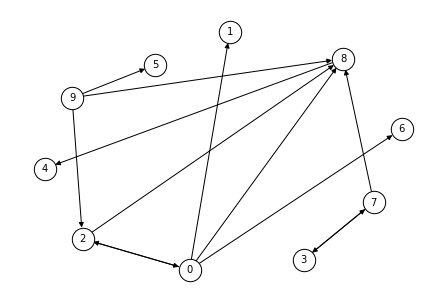

In [192]:
import networkx as nx

G = nx.gnp_random_graph(10,0.1,directed=True)
pos = nx.spring_layout(G,k=10)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=500, 
        node_color='white', edgecolors='black')

In [193]:
# Estados de los nodos:
# 0: no visitado
# 1: visitado

def get_nodes(G, initial=0):
  state = dict()
  for n in G: state[n] = 0

  nodes = list()

  S = list()
  S.append(initial)

  while len(S) != 0:
    n = S.pop(initial)

    adj_nodes = G[n]
    for adj in adj_nodes:
      if state[adj] == 0:
        state[adj] = 1 
        S.append(adj)
        nodes.append(adj)

  return nodes

get_nodes(G,0)

[1, 2, 6, 8, 0, 4]

# Actividad 2

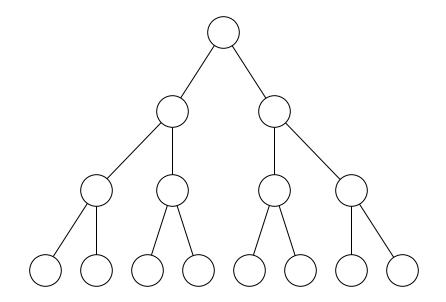

In [149]:
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2,3)

pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos, with_labels=False, font_size=12, node_size=1000, 
        node_color='white', edgecolors='black')

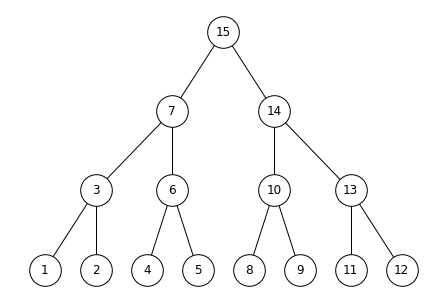

In [150]:
# Estados de los nodos:
# 0: no descubierto
# 1: descubierto
# 2: visitado

def DFS(T, initial=0):
  state = dict()
  for n in T: state[n] = 0

  S = [initial]
  count = 1

  while len(S) > 0:
    n = S.pop()

    if state[n] == 0:
      state[n] = 1
      S.append(n)

      for adj in reversed(list(T[n])):
        if state[adj] == 0: S.append(adj)

    elif state[n] == 1:
      state[n] = 2
      T.nodes[n]['label'] = count
      labels[n] = count
      count += 1

labels = dict()
DFS(T,0)

pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos, with_labels=True, font_size=12, node_size=1000, 
        node_color='white', edgecolors='black', labels=labels)

# Actividad 3

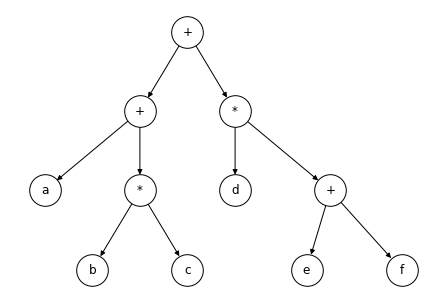

In [151]:
labels = {
    0: '+',
    1: '+',
    2: '*',
    3: 'a',
    4: '*',
    5: 'd',
    6: '+',
    7: 'b',
    8: 'c',
    9: 'e',
    10: 'f'  
}

edges = [(0,1),(0,2),(1,3),(1,4),(4,7),(4,8),(2,5),(2,6),(6,9),(6,10)]

G = nx.DiGraph()
G.add_edges_from(edges)

for n in G.nodes():
  G.nodes[n]['label'] = labels[n]

pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000,
        node_color='white', edgecolors='black', labels=labels)

In [152]:
def DFS(G, initial=0):
  adj_list = list(G[initial])

  if len(adj_list) == 0:
    print(G.nodes[initial]['label'], end='')
    return

  if initial != 0: print('(', end='')
  DFS(G, adj_list[0])
  print(G.nodes[initial]['label'], end='')
  DFS(G, adj_list[1])
  if initial != 0: print(')', end='')

DFS(G,0)

(a+(b*c))+(d*(e+f))